# Анализ тестовой выборки

In [5]:
%cd ..

/Users/rzaripov/Desktop/ITMO/avito-ds-internship-task


In [ ]:
%conda install -c conda-forge wordcloud seaborn

In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import seaborn as sns
from transformers import (
    AutoTokenizer
)

In [9]:
file_path = 'data/dataset_1937770_3.txt'
output_path = 'data/test.csv'

In [10]:
with open(file_path, 'r', encoding='utf-8') as in_file:
    with open(output_path, 'w', newline='', encoding='utf-8') as out_file:
        writer = csv.writer(out_file)
        for line in in_file:
            line = line.strip()
            if line:
                # Находим первое вхождение запятой
                first_comma_index = line.find(',')
                if first_comma_index != -1:
                    # Разделяем на число и текст
                    number = line[:first_comma_index].strip()
                    text = line[first_comma_index + 1:].strip()
                    writer.writerow([number, text])

In [14]:
test = pd.read_csv(output_path, index_col='id')

In [17]:
test.head(20)

,text_no_spaces
id,
0,куплюайфон14про
1,ищудомвПодмосковье
2,сдаюквартирусмебельюитехникой
3,новыйдивандоставканедорого
4,отдамдаромкошку
5,работавМосквеудаленно
6,куплютелевизорPhilips
7,ищугрузчиковдляпереезда
8,ремонтквартирподключ


In [18]:
test['len'] = test['text_no_spaces'].map(lambda text: len(text))

In [19]:
test

,text_no_spaces,len
id,,
0,куплюайфон14про,15
1,ищудомвПодмосковье,18
2,сдаюквартирусмебельюитехникой,29
3,новыйдивандоставканедорого,26
4,отдамдаромкошку,15
...,...,...
1000,Янеусну.,8
1001,Весна-яуженегреюпио.,20
1002,Весна-скоровырастеттрава.,25


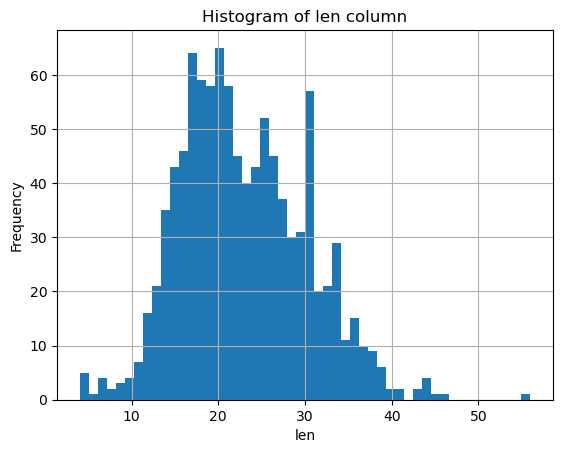

In [29]:
test['len'].hist(bins=50)
plt.title('Histogram of len column')
plt.xlabel('len')
plt.ylabel('Frequency')
plt.show()

In [30]:
test['len'].describe()

count    1005.000000
mean       22.860697
std         7.213070
min         4.000000
25%        18.000000
50%        22.000000
75%        28.000000
max        56.000000
Name: len, dtype: float64

In [32]:
def get_characters_count(df):
    """
    Get all unique characters and their counts
    """
    all_text = ''.join(df['text_no_spaces'].astype(str).fillna(''))
    char_counter = Counter(all_text)
    return char_counter

In [33]:
char_counts = get_characters_count(test)

In [56]:
for char, count in char_counts.items():
    print(f"'{char}' - {count}")

'к' - 919
'у' - 979
'п' - 611
'л' - 920
'ю' - 299
'а' - 1716
'й' - 308
'ф' - 57
'о' - 2192
'н' - 1274
'1' - 12
'4' - 5
'р' - 1019
'и' - 1251
'щ' - 167
'д' - 773
'м' - 741
'в' - 793
'П' - 51
'с' - 1001
'ь' - 382
'е' - 1585
'т' - 1275
'б' - 356
'х' - 166
'ы' - 396
'г' - 313
'ш' - 176
'М' - 41
'з' - 296
'P' - 16
'h' - 16
'i' - 40
'l' - 15
'p' - 9
's' - 36
'ч' - 265
'я' - 425
'H' - 5
'S' - 18
'a' - 38
'm' - 15
'u' - 14
'n' - 38
'g' - 10
'F' - 1
'e' - 29
'd' - 9
'r' - 9
'ж' - 196
'X' - 7
'b' - 5
'o' - 42
'x' - 3
'O' - 6
'3' - 4
'y' - 7
't' - 15
'5' - 9
'ц' - 87
'I' - 7
'M' - 4
'L' - 15
'G' - 10
'E' - 3
'D' - 5
'Y' - 1
'k' - 5
'A' - 9
'T' - 4
'w' - 3
',' - 429
'2' - 8
'7' - 4
'!' - 29
'B' - 4
'c' - 5
'8' - 1
'Е' - 10
'Г' - 14
'Э' - 1
'ё' - 66
'В' - 84
'А' - 37
'З' - 17
'-' - 62
'0' - 5
'6' - 2
'.' - 156
'э' - 23
'R' - 5
'J' - 2
'v' - 3
'’' - 1
'ъ' - 4
'C' - 4
'V' - 1
'Т' - 36
'О' - 25
'Й' - 1
'К' - 22
'Р' - 14
'Я' - 43
'Д' - 13
'?' - 13
'W' - 1
'С' - 43
'И' - 58
'K' - 1
'Н' - 85
'У' - 7
'Б' 

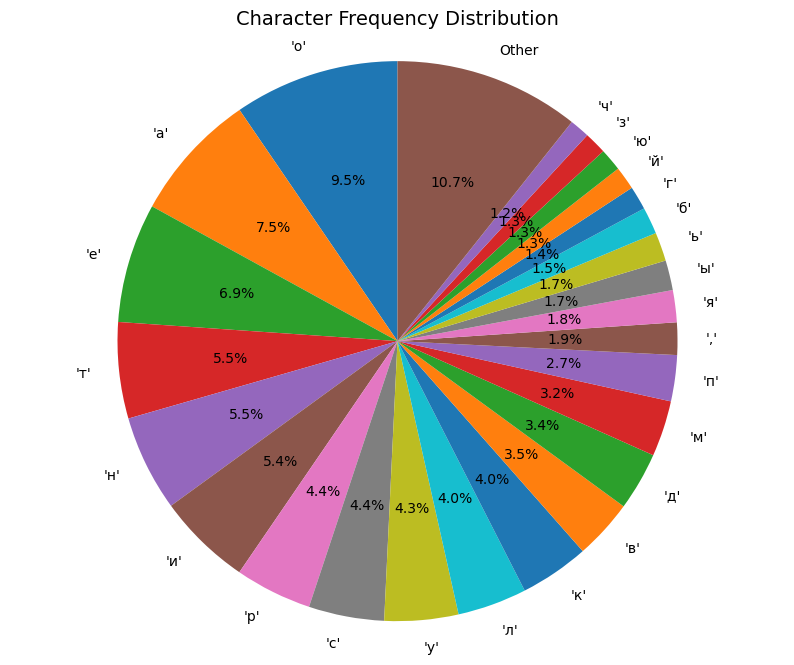

In [55]:
def plot_character_pie(char_counts, top_n=15):
    """
    Create a pie chart showing character proportions
    """
    most_common = char_counts.most_common(top_n)
    other_count = sum(count for char, count in char_counts.items()) - sum(count for char, count in most_common)
    
    labels = [f"'{char}'" if len(char) == 1 and char not in [' ', '\t', '\n'] else 
             "' '" if char == ' ' else
             '\\t' if char == '\t' else
             '\\n' if char == '\n' else str(char)
             for char, count in most_common]
    
    sizes = [count for char, count in most_common]
    
    if other_count > 0:
        labels.append('Other')
        sizes.append(other_count)
    
    plt.figure(figsize=(10, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title('Character Frequency Distribution', fontsize=14)
    plt.show()

plot_character_pie(char_counts, top_n=25)

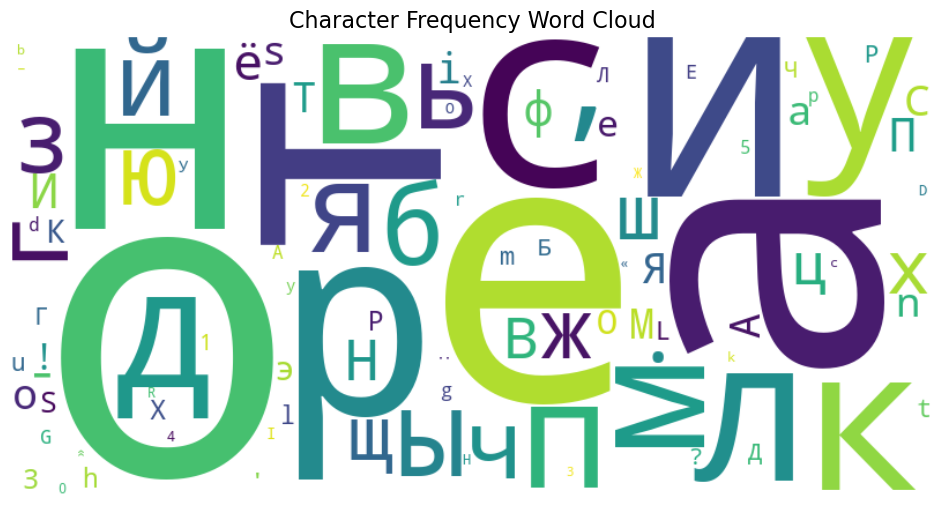

In [41]:
def plot_character_wordcloud(freqs):
    """
    Create a wordcloud-style visualization for characters
    """
    wc = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='viridis',
        max_words=100
    ).generate_from_frequencies(freqs)
    
    plt.figure(figsize=(12, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title('Character Frequency Word Cloud', fontsize=16)
    plt.show()

plot_character_wordcloud(char_counts)

Other category stat:
'’' - b'\xe2\x80\x99' - 1
'—' - b'\xe2\x80\x94' - 3
'…' - b'\xe2\x80\xa6' - 1
'–' - b'\xe2\x80\x93' - 6
'«' - b'\xc2\xab' - 6
'»' - b'\xc2\xbb' - 6


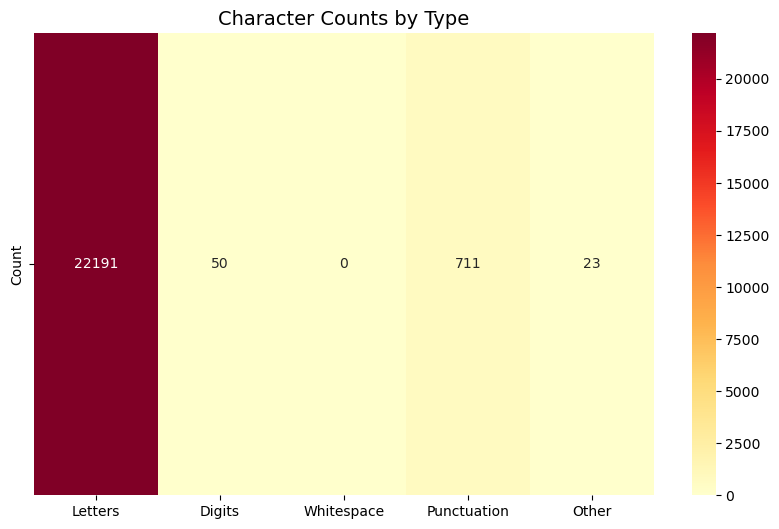

In [62]:
def plot_character_heatmap(char_counts):
    """
    Create a heatmap by character type
    """
    categories = {
        'Letters': [],
        'Digits': [],
        'Whitespace': [],
        'Punctuation': [],
        'Other': []
    }
    
    print("Other category stat:")
    for char, count in char_counts.items():
        if char.isalpha():
            categories['Letters'].append(count)
        elif char.isdigit():
            categories['Digits'].append(count)
        elif char.isspace():
            categories['Whitespace'].append(count)
        elif char in '!@#$%^&*()_+-=[]{}|;:\"\',.<>?/':
            categories['Punctuation'].append(count)
        else:
            print(f"'{char}' - {char.encode('utf-8')} - {count}")
            categories['Other'].append(count)
    
    category_sums = {cat: sum(counts) for cat, counts in categories.items()}
    
    plt.figure(figsize=(10, 6))
    sns.heatmap([list(category_sums.values())], 
                xticklabels=list(category_sums.keys()),
                yticklabels=['Count'],
                annot=True, fmt='d', cmap='YlOrRd')
    plt.title('Character Counts by Type', fontsize=14)
    plt.show()

plot_character_heatmap(char_counts)

## Анализ количества токенов для моделей

In [2]:
model_name = "google/byt5-small"
tokenizer = AutoTokenizer.from_pretrained(model_name)

tokenizer_config.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/698 [00:00<?, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

In [5]:
test = pd.read_csv('/kaggle/input/avito-ds-dataset/test.csv', index_col='id')
test.head(2)

,text_no_spaces
id,
0,куплюайфон14про
1,ищудомвПодмосковье


In [6]:
test['tokenized'] = test['text_no_spaces'].map(tokenizer.encode)
test['tokenized_len'] = test['tokenized'].map(len)
test

,text_no_spaces,tokenized,tokenized_len
id,,,
0,куплюайфон14про,"[211, 189, 212, 134, 211, 194, 211, 190, 212, ...",29
1,ищудомвПодмосковье,"[211, 187, 212, 140, 212, 134, 211, 183, 211, ...",37
2,сдаюквартирусмебельюитехникой,"[212, 132, 211, 183, 211, 179, 212, 145, 211, ...",59
3,новыйдивандоставканедорого,"[211, 192, 211, 193, 211, 181, 212, 142, 211, ...",53
4,отдамдаромкошку,"[211, 193, 212, 133, 211, 183, 211, 179, 211, ...",31
...,...,...,...
1000,Янеусну.,"[211, 178, 211, 192, 211, 184, 212, 134, 212, ...",16
1001,Весна-яуженегреюпио.,"[211, 149, 211, 184, 212, 132, 211, 192, 211, ...",39
1002,Весна-скоровырастеттрава.,"[211, 149, 211, 184, 212, 132, 211, 192, 211, ...",49


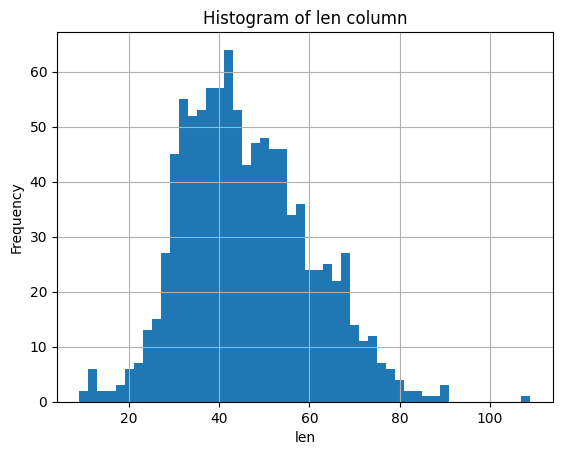

In [7]:
test['tokenized_len'].hist(bins=50)
plt.title('Histogram of len column')
plt.xlabel('len')
plt.ylabel('Frequency')
plt.show()

In [8]:
test['tokenized_len'].describe()

count    1005.000000
mean       45.479602
std        14.281003
min         9.000000
25%        35.000000
50%        43.000000
75%        55.000000
max       109.000000
Name: tokenized_len, dtype: float64

Вывод:
- размер тестовой строки в среднем `22.860697`, диапазон значений `4-56` => обрабатывать окно в 60-64 символа
- размер токен последовательности в среднем `45.479602`, диапазон значений `9-109` => параметр max_length = 128
- есть буквы как `русского`, так и `английского` языков
- типы символов: `буквы`, `числа` и `знаки пунктуации`
- есть `экзотические символы`:
    1. '’' - b'\xe2\x80\x99' - 1
    2. '—' - b'\xe2\x80\x94' - 3
    3. '…' - b'\xe2\x80\xa6' - 1
    4. '–' - b'\xe2\x80\x93' - 6
    6. '«' - b'\xc2\xab' - 6
    7. '»' - b'\xc2\xbb' - 6
    
[Таблица символов](https://www.utf8-chartable.de/unicode-utf8-table.pl?start=8192&number=128&utf8=string-literal)